# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Saeedreza Zouashkiani
2.   Student Number: 400206262


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
# from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [4]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

ap = pd.merge(artists, plays, left_on='id', right_on='artistID', how='inner')
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [20]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [5]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [6]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

ap = ap.drop('id', axis=1).reset_index(drop=True)

In [7]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


artist_rank = ap.groupby(['name']).agg({'userID' : 'count', 'playCount' : 'sum'}).rename(columns={'userID':'totalUniqueUsers', 'playCount':'totalArtistPlays'}).sort_values(['totalArtistPlays'], ascending=False)

artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays']/artist_rank['totalUniqueUsers']
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [12]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [8]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################



ap = ap.join(artist_rank, on='name', how='inner').sort_values(['playCount'], ascending=False)

In [ ]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [9]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x=x[:20], y=y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

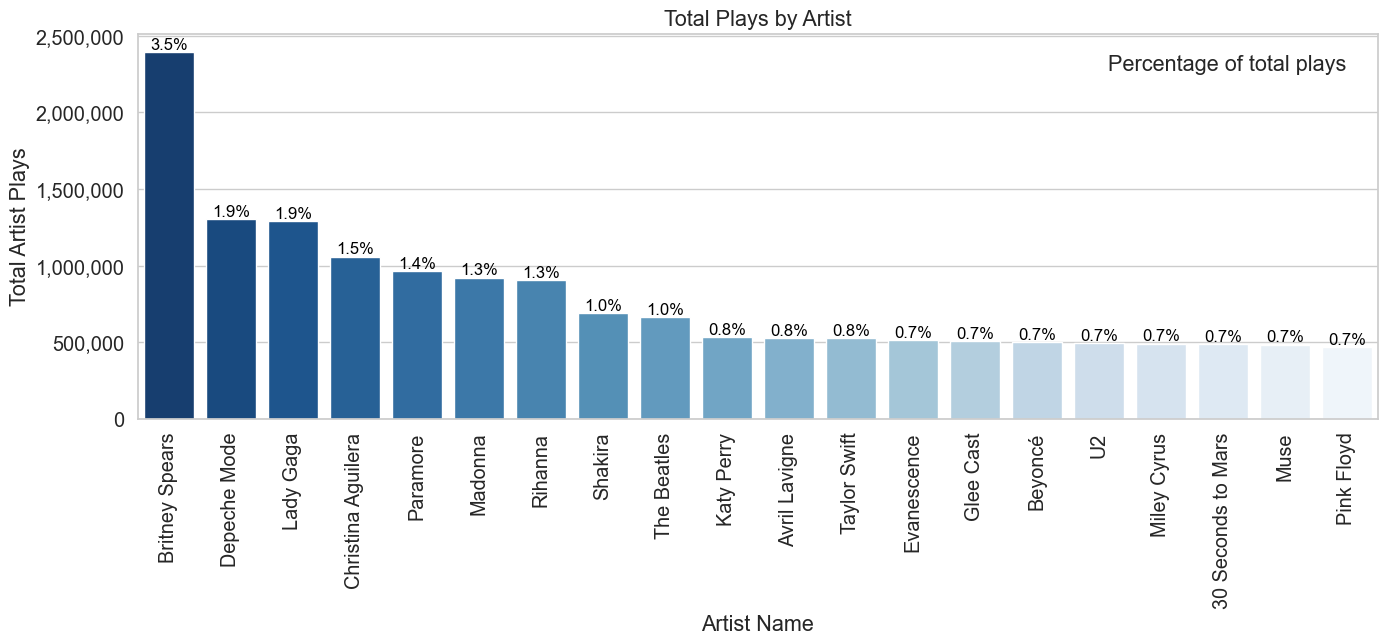

In [10]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

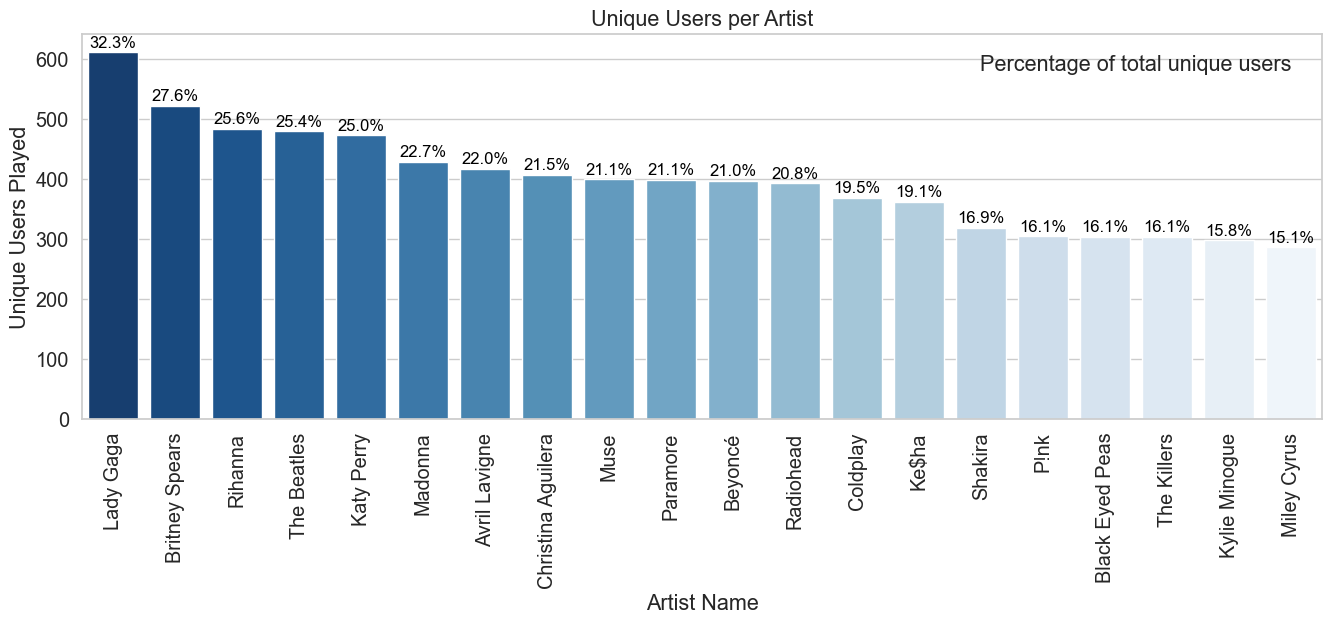

In [11]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

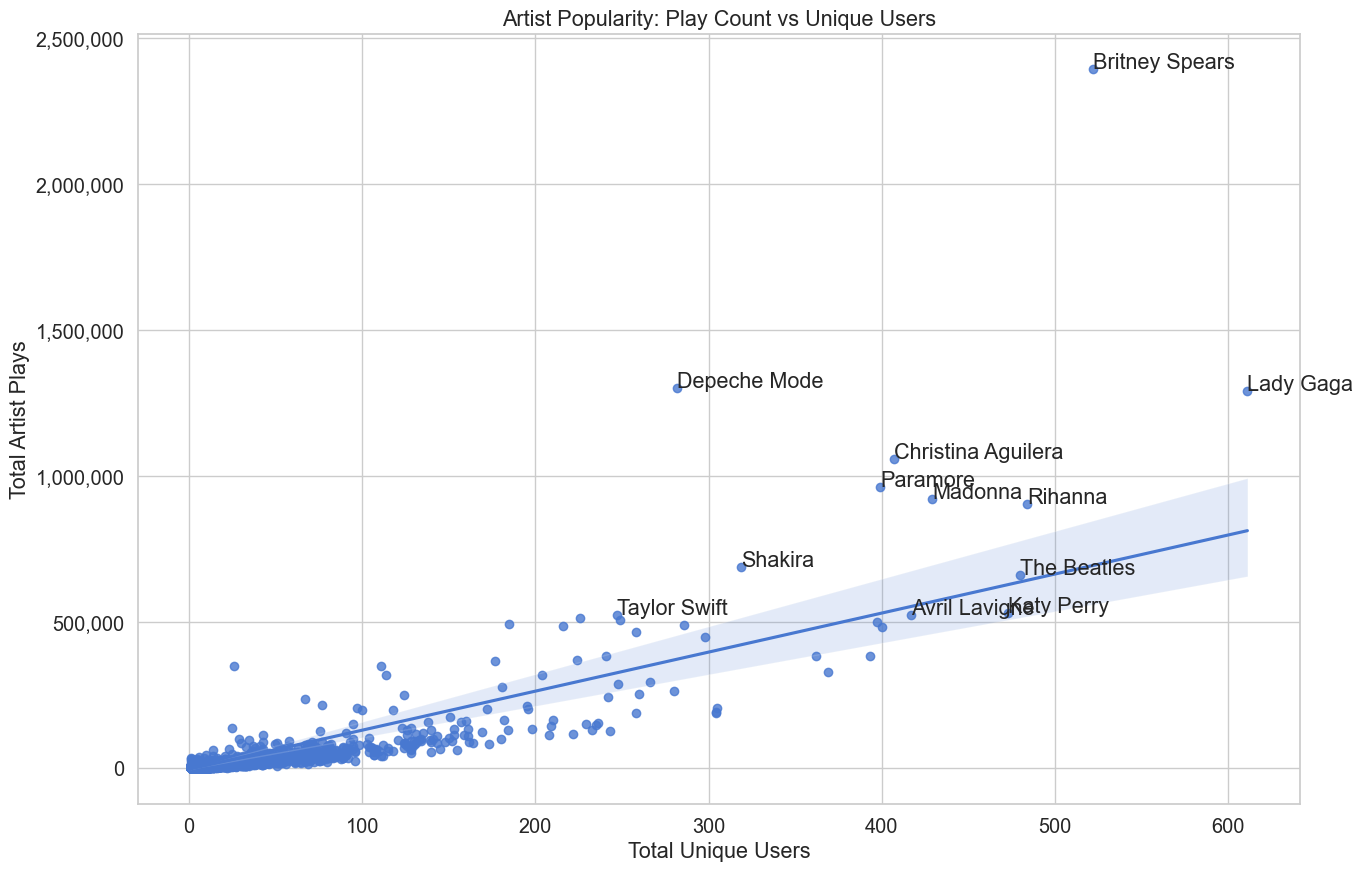

In [12]:
top_artists = artist_rank.sort_values('totalArtistPlays', ascending=False).head(12).index # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank['totalUniqueUsers'] # TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank['totalArtistPlays'] # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x=x,y=y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [13]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [14]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df = ap.pivot(index='userID', columns='artistID', values='playCountScaled')
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings = ratings_df.fillna(0).values

In [31]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
sparsity = ratings.nonzero()[0].shape[0] / (ratings.shape[0] * ratings.shape[1]) * 100
sparsity

## END

0.2763750225421394

# Fitting(Training) Model (50pts)

In [36]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    train = ratings.copy()
    validation = np.zeros(ratings.shape)

    for u in np.arange(ratings.shape[0]):
        if (ratings[u, :].nonzero()[0].shape[0] >= MIN_USER_RATINGS):
            val = np.random.choice(ratings[u, :].nonzero()[0],  size=DELETE_RATING_COUNT, replace=False)
            train[u, val] = 0
            validation[u, val] = ratings[u, val]
    return train, validation

In [39]:
train, val = train_test_split(ratings)

In [42]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() # TODO
    ground_truth = ground_truth[ground_truth.nonzero()].flatten() # TODO
    return sqrt(mean_squared_error(prediction, ground_truth))

In [56]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    return P.T @ Q
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration
    m, n = X_train.shape

    self.P = np.random.rand(self.n_latent_features, m)
    self.Q = np.random.rand(self.n_latent_features, n)

    self.train_err, self.val_err = [], []
    users, items = X_train.nonzero()

    for epoch in range(self.n_epochs):
      for u, i in zip(users, items):
        e_ui = X_train[u, i] - self.predictions(self.P[:, u], self.Q[:, i])
        # print(e_ui, self.Q[:, i].shape, self.P[:, u].shape)
        self.P[:, u] += self.learning_rate * (e_ui * self.Q[:, i] - self.lmbda * self.P[:, u])
        self.Q[:, i] += self.learning_rate * (e_ui * self.P[:, u] - self.lmbda * self.Q[:, i])
        

      self.train_err.append(rmse(self.predictions(self.P, self.Q), X_train))
      self.val_err.append(rmse(self.predictions(self.P, self.Q), X_val))
    
    return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    y_pred = self.predictions(self.P, self.Q)
    pred_index = np.where(X_train[user_index, :] == 0)[0]
    y_pred = y_pred[user_index, pred_index].flatten()
    return y_pred

In [57]:
#creating recommender object
recommender = Recommender().fit(train, val)

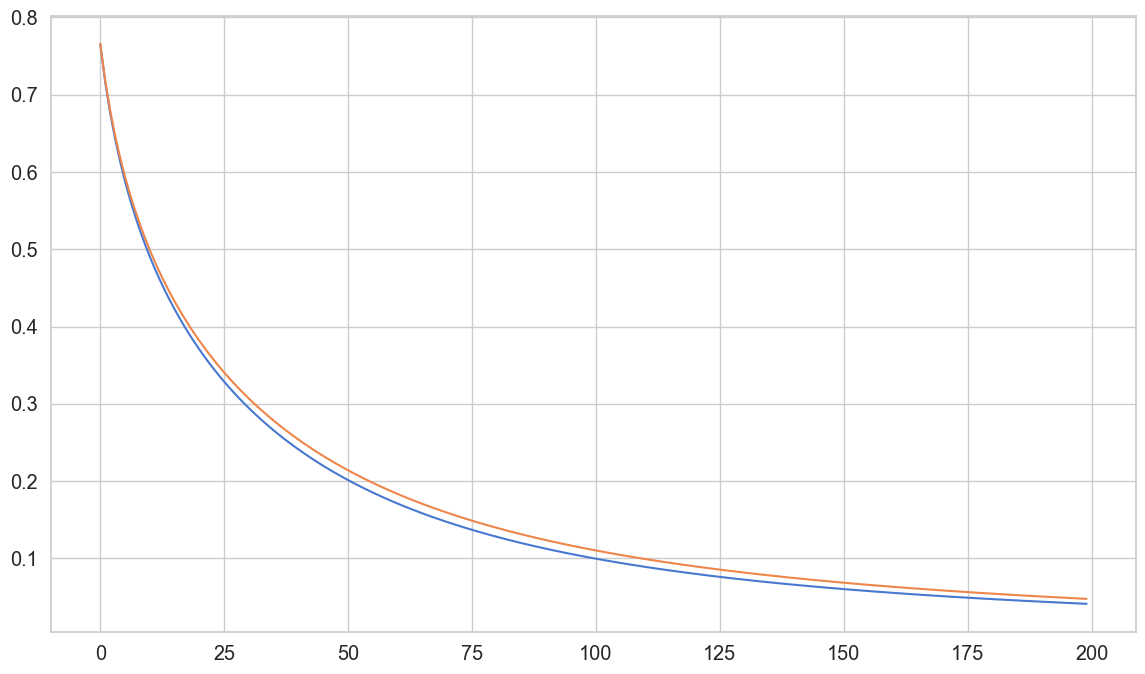

In [59]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
train_error_history = recommender.train_err
val_error_history = recommender.val_err

plt.figure()
plt.plot(train_error_history)
plt.plot(val_error_history)
plt.show()
#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [60]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [61]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [62]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,472,3 Doors Down,0.052734
1,923,Children of Bodom,0.042016
2,978,Disturbed,0.029742
3,1104,Rammstein,0.025657
4,1118,A Perfect Circle,0.021690
5,1131,Tool,0.021562
6,1179,Billy Talent,0.020879
7,2172,Gojira,0.017051
8,2479,Twiztid,0.010990
9,6257,Rob Zombie,0.010354


In [63]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,1311,Donkey Rollers,0.120367
1,4935,I Declare War,0.119298
2,6236,BIANIK CITY,0.118960
3,11567,Atlas Plug,0.118515
4,12760,Dave House,0.117928
5,14585,Tianastácia,0.117734
6,14900,Dev Feat. The Cataracs,0.117721
7,15415,Ані Лорак,0.117717
8,17106,grup genç,0.117591
9,17354,Hassan Hakmoun & Adam Rudolph,0.117310


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**